<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

**CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS (BIG DATA PROCESSING AND ANALYTICS)**<p>
**Componente curricular:** BIG DATA ANALYTICS: ANÁLISE ESTATÍSTICA - 91162 - 2022.2 - 01D - Trilha 3.<br>

**Aluno:** ROBSON DE FREITAS SAMPAIO.<br>

**URL deste notebook:** https://github.com/rfsampaio/postgraduate_data_science/blob/main/notebooks/AE_T3.ipynb<br>
***

### **Atividade - Trilha 3**

**Diamonds** é uma base de dados que contém os preços e outros atributos de quase 54.000 diamantes. De fato, são 53.940 linhas e 10 variáveis, mostradas a seguir:

| Variável | Descrição |
|---|---|
| carat | peso do diamante (0.2--5.01) |
| clarity | medida de quão claro é o diamante (I1 (pior), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (melhor)) |
| color | cor do diamante, indo de J (pior) a D (melhor) |
| cut | qualidade do corte (Fair, Good, Very Good, Premium, Ideal) |
| depth | percentual de profundidade total = z / mean(x, y) = 2 * z / (x + y) (43--79) |
| table | largura do topo do diamante relativo ao ponto mais largo (43--95) |
| price | preço em dólares americanos ($326--$18,823) |
| x | comprimento em mm (0--10.74) |
| y | largura em mm (0--58.9) |
| z | profundidade em mm (0--31.8) |

Após carregar a base de dados no R, vamos a algumas explorações:

1. Qual é a estrutura do conjunto de dados "diamantes"?
2. Explore a parte inicial e a final do conjunto de dados.
3. Faça alguns sumários estatísticos para entender melhor a base de dados.
4. A saída da função "summary()" está de acordo com a descrição mostrada anteriormente?
5. Explore a variável "price", seguindo o modelo de exploração.
6. Veja a distribuição da variável (histograma); observe a faixa de valores da variável.
7. Explore também as variáveis "carat", "cut", "color", "clarity", "x", "y", "z", "depth" e "table", seguindo o modelo de exploração.
8. Crie "boxplots" para as variáveis numéricas; veja se existem dados anormais (outliers).
9. Utilize as variáveis categóricas para fazer o facetamento dos dados, mostrando alguns gráficos com 2 ou mais variáveis contínuas lado a lado.

Para cada resultado/gráfico obtido, explique e discuta-os, de modo a construir um relatório de exploração dos dados, que deverá ser submetido. 

### **Carregando bibliotecas necessárias:**

In [33]:
# install.packages("ggpubr")
library(tidyverse)
library(ggpubr)

### **Carregando o conjunto de dados "Diamonds" do pacote "ggplot2":**

In [6]:
# importando a biblioteca "ggplot2"
library(ggplot2)

# importando a biblioteca "dplyr"
library(dplyr)

# importando o conjunto de dados "diamonds"
data(diamonds) 

# carregando o conjunto de dados "diamonds" na variável "diamantes"
diamantes <- diamonds

### **Resolução:**

**1. Qual é a estrutura do conjunto de dados "diamantes"?**

In [7]:
str(diamantes, strict.width = "wrap", give.attr = FALSE)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
$ carat : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
$ cut : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
$ color : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
$ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
$ depth : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
$ table : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
$ price : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
$ x : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
$ y : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
$ z : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


A estrutura da base está correta, os tipos de dados batem com a descrição, assim como o número de observações e a quantidade de variáveis. Os nomes das variáveis também estão adequados, nenhuma alteração é necessária.

**2. Explore a parte inicial e a final do conjunto de dados.**

In [8]:
# exibindo a parte inicial do conjunto de dados
head(diamantes)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [9]:
# exibindo a parte final do conjunto de dados
tail(diamantes)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.72,Premium,D,SI1,62.7,59,2757,5.69,5.73,3.58
0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
0.86,Premium,H,SI2,61.0,58,2757,6.15,6.12,3.74
0.75,Ideal,D,SI2,62.2,55,2757,5.83,5.87,3.64


Nenhum problema encontrado na parte inicial e também na parte final dos dados.

**3. Faça alguns sumários estatísticos para entender melhor a base de dados.**

In [10]:
# obtendo o sumário estatístico para o conjunto de dados
summary(diamantes)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

**4. A saída da função "summary()" está de acordo com a descrição mostrada anteriormente?**

Um ponto que chama atenção na saída da função "summary()" acima é que temos o valor mínimo de zero em "x", "y" e "z". Sendo essas variáveis as dimensões de uma pedra, parece estranho esse valor.

Antes de qualquer coisa, vamos verificar o que significa os valores zero nas dimensões de uma pedra.

In [11]:
# obtendo a quantidade de linhas com valores zerados nas variáveis "x", "y" ou "z"
diamantes %>% filter(x == 0 | y == 0 | z == 0) %>% nrow()

[1] 20

In [12]:
# obtendo as linhas com valores zerados nas variáveis "x", "y" ou "z"
filter(diamantes, x == 0 | y == 0 | z == 0)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.00,Premium,G,SI2,59.1,59,3142,6.55,6.48,0
1.01,Premium,H,I1,58.1,59,3167,6.66,6.60,0
1.10,Premium,G,SI2,63.0,59,3696,6.50,6.47,0
1.01,Premium,F,SI2,59.2,58,3837,6.50,6.47,0
1.50,Good,G,I1,64.0,61,4731,7.15,7.04,0
1.07,Ideal,F,SI2,61.6,56,4954,0.00,6.62,0
1.00,Very Good,H,VS2,63.3,53,5139,0.00,0.00,0
1.15,Ideal,G,VS2,59.2,56,5564,6.88,6.83,0
1.14,Fair,G,VS1,57.5,67,6381,0.00,0.00,0


Pelas informações acima, são somente 20 pedras que têm uma ou mais dimensões faltando. Não parece ser nada muito significativo nesse momento.

**5. Explore a variável "price", seguindo o modelo de exploração.**

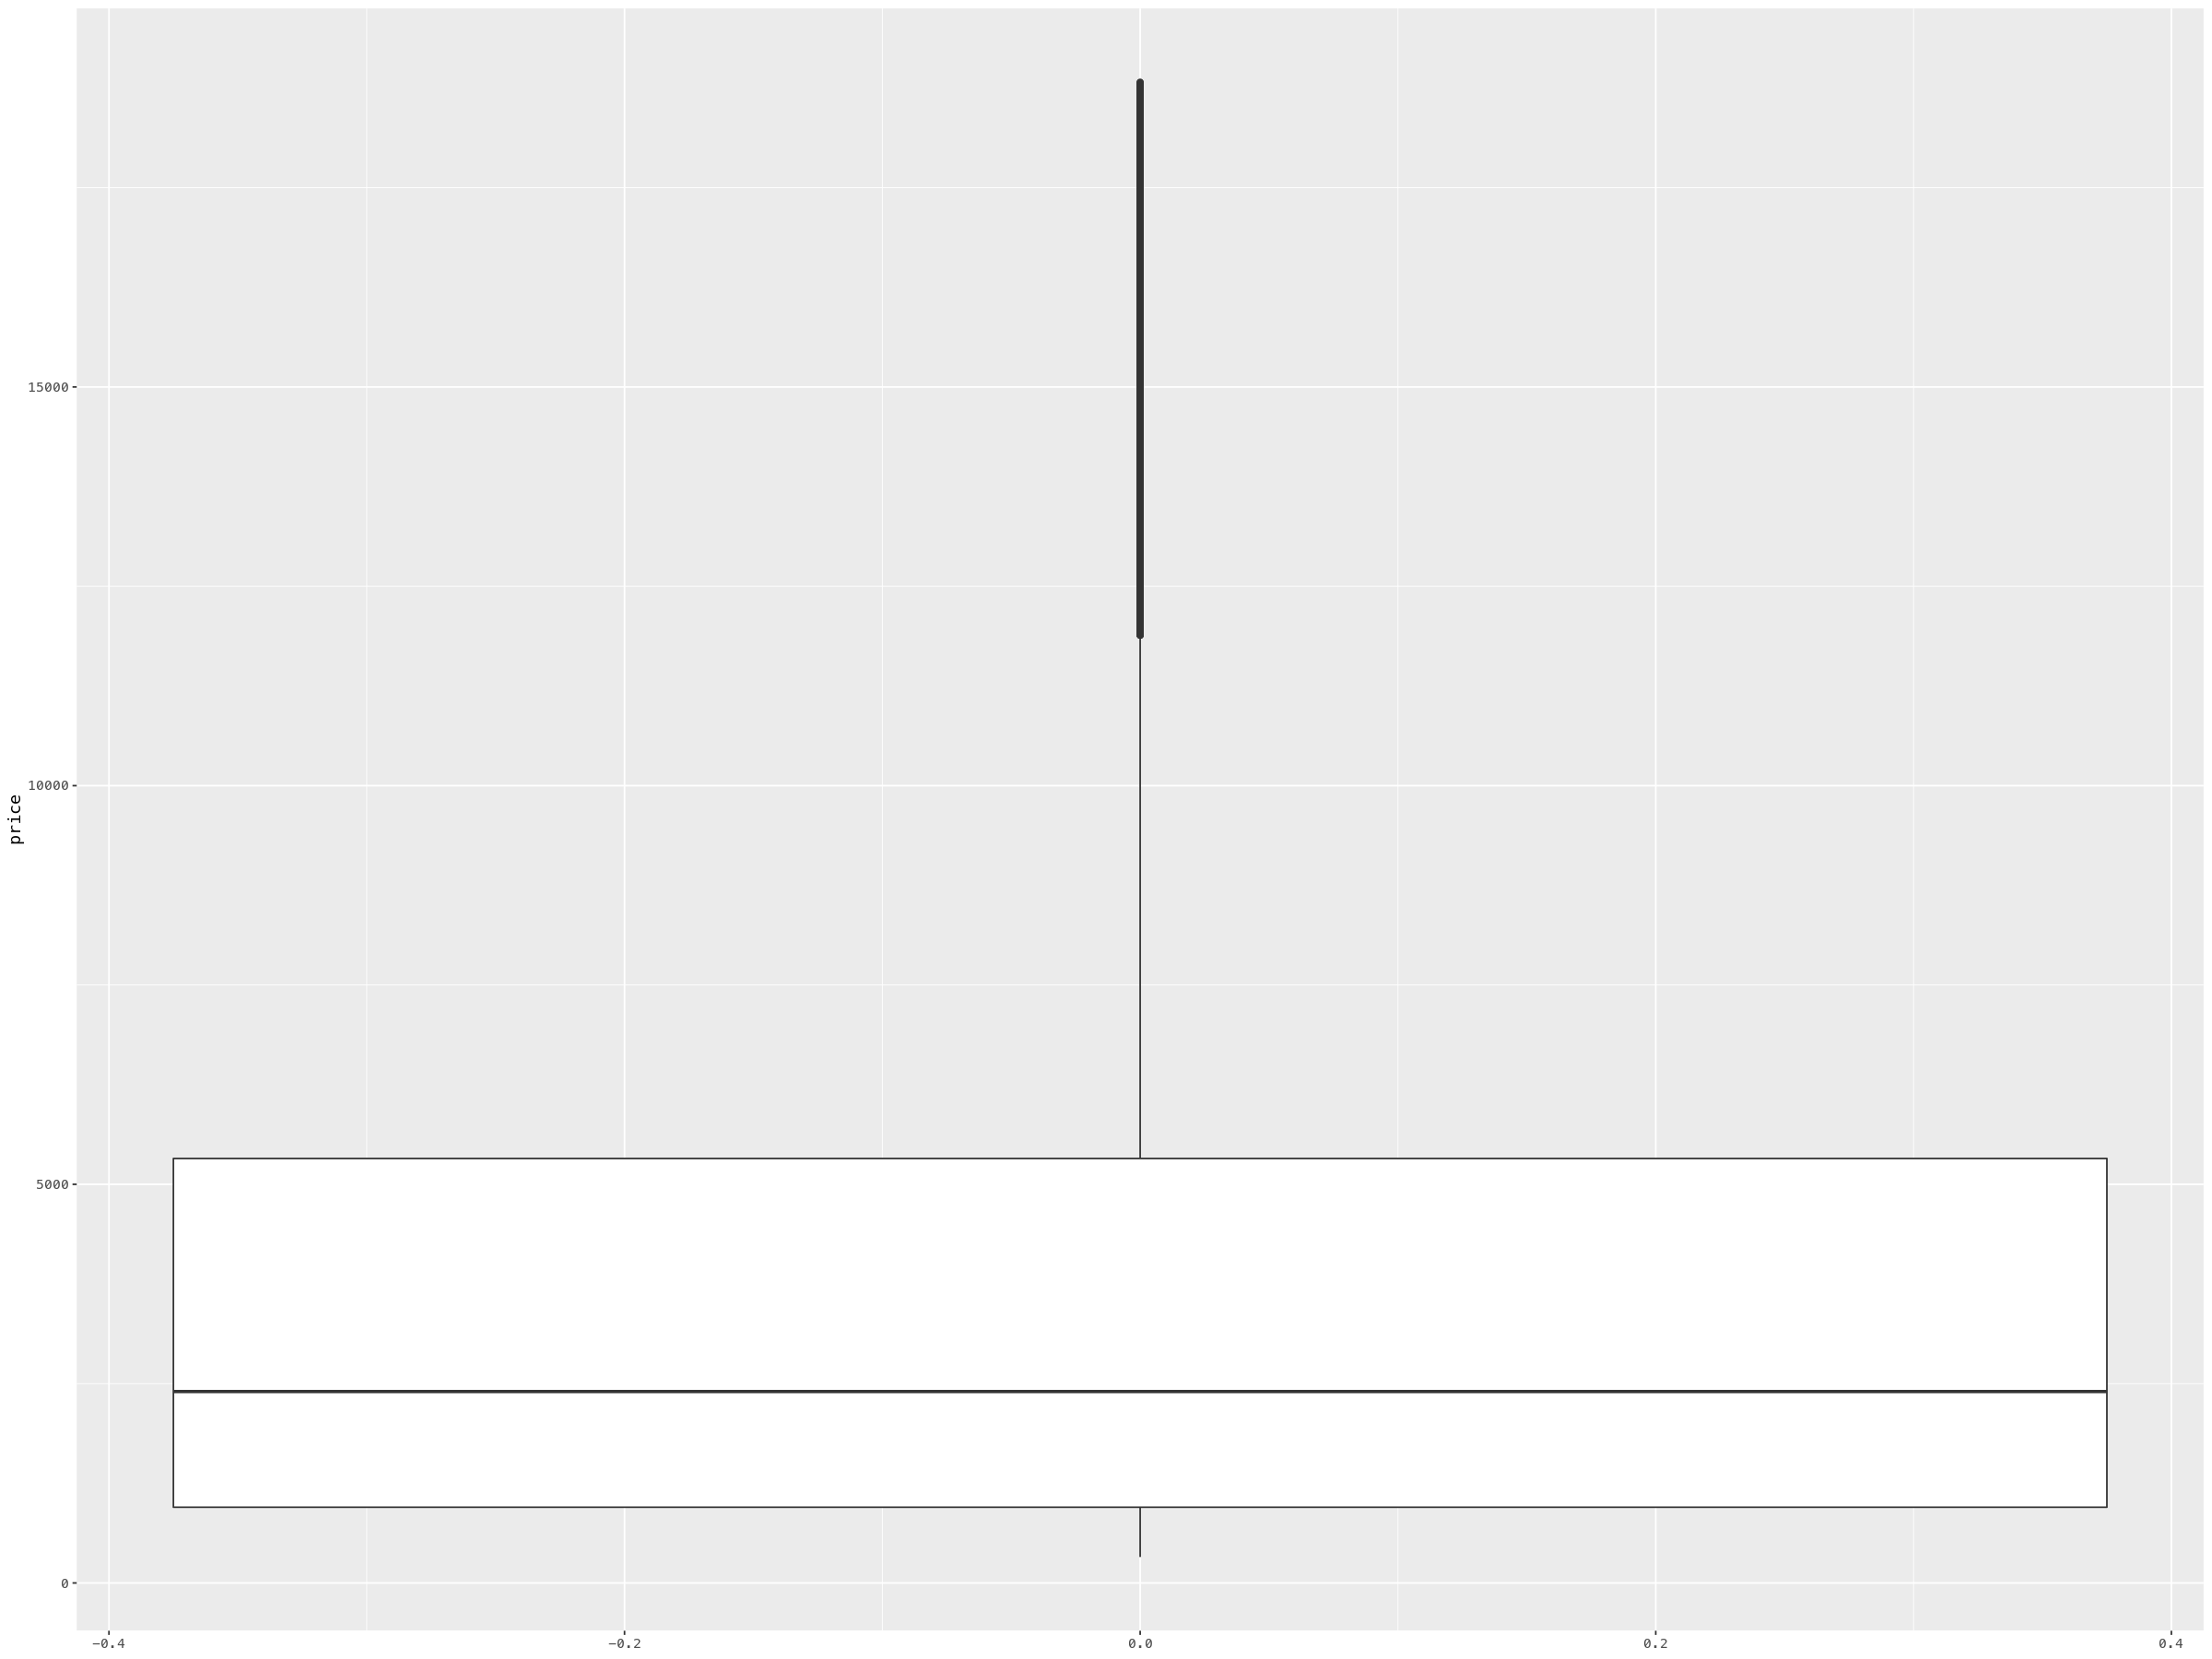

In [42]:
# exibindo o boxplot da variável "price"
ggplot(diamantes, aes(y=price)) + geom_boxplot()

Interessante observar a existência de outliers que estão muito fora do espaço amostral. Parece necessário explorar as demais variáveis com um pouco mais de detalhes para compreender melhor o comportamento individual da variável "price".

**6. Veja a distribuição da variável (histograma); observe a faixa de valores da variável.**

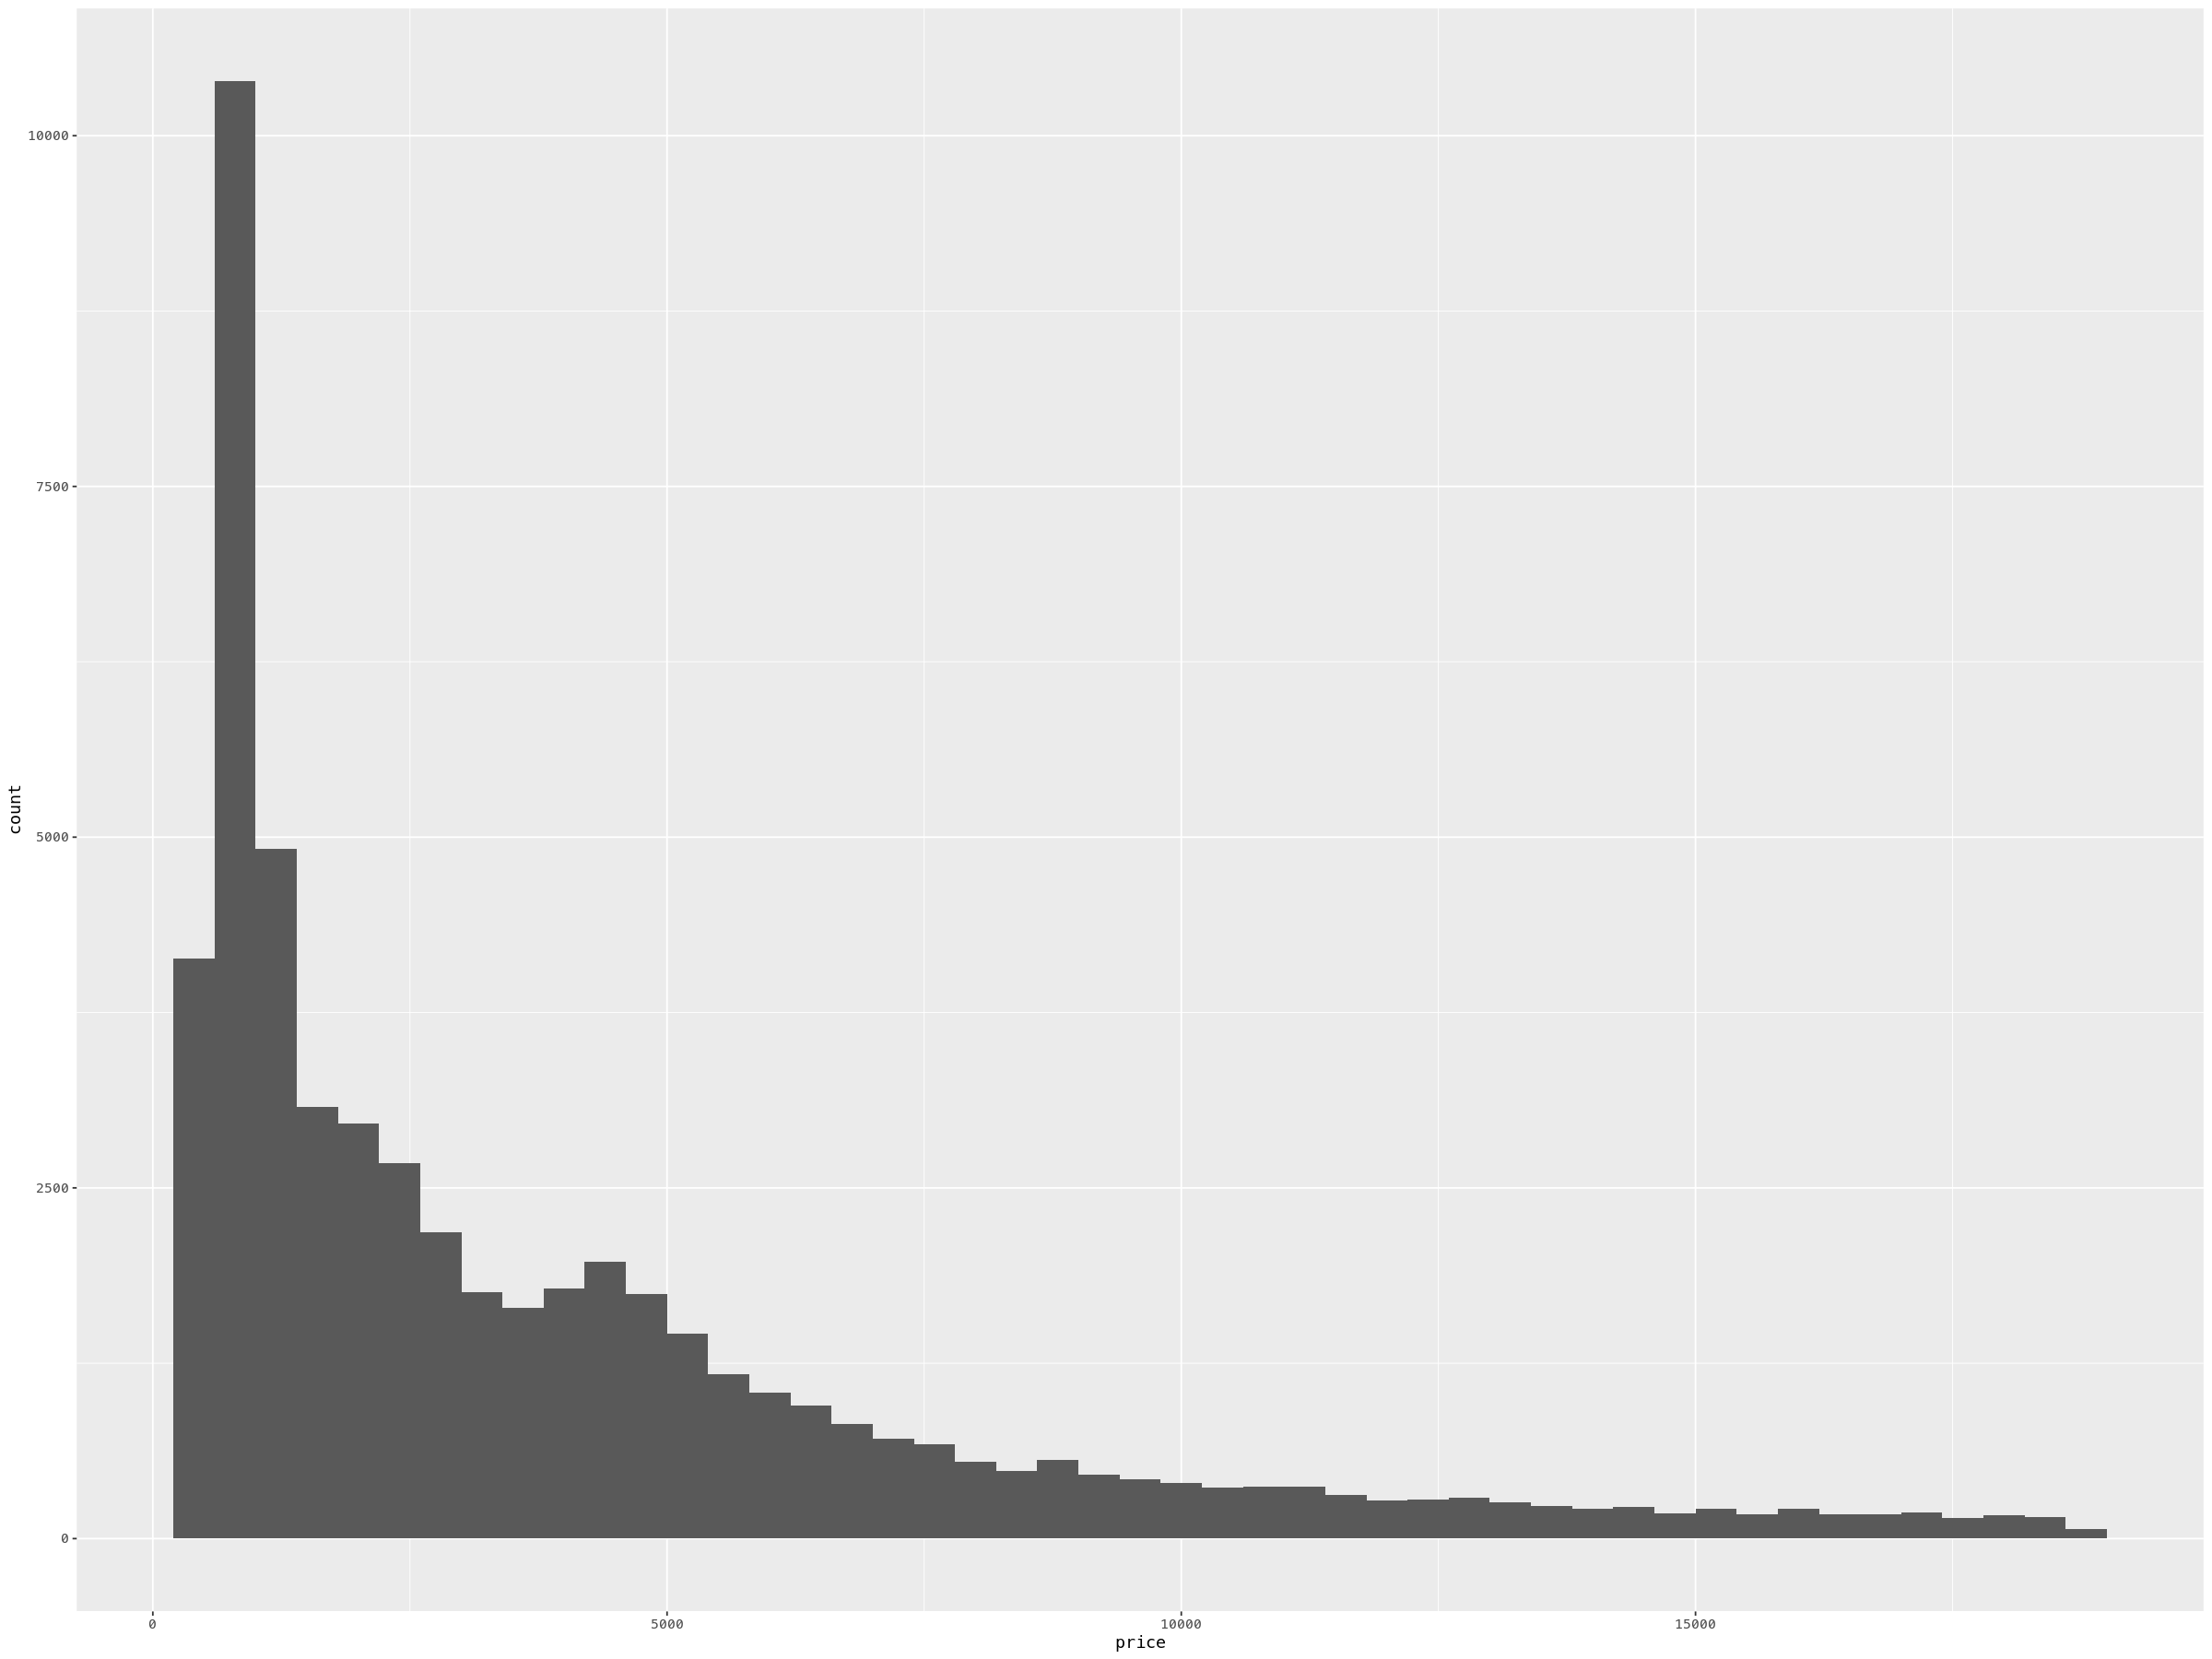

In [41]:
# exibindo o histograma da variável "price"
ggplot(diamantes, aes(x=price)) + geom_histogram(binwidth=400)

**7. Explore também as variáveis "carat", "cut", "color", "clarity", "x", "y", "z", "depth" e "table", seguindo o modelo de exploração.**

Como as variáveis "cut", "color" e "clarity" são categóricas e ordinais, vamos inpecionar seus níveis e ordem para garantir que tudo está correto.

In [48]:
# exibindo os níveis das variáveis "cut", "color" e "clarity"
levels(diamantes$cut);
levels(diamantes$color);
levels(diamantes$clarity)

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"

[1] "D" "E" "F" "G" "H" "I" "J"

[1] "I1"   "SI2"  "SI1"  "VS2"  "VS1"  "VVS2" "VVS1" "IF"

A ordem da variável "color" está invertida. Segundo o dicionário de dados J é o pior valor e D é o melhor. Vamos inverter a ordem dos fatores para ficar condizente com as outras variáveis.

In [49]:
diamantes$color = factor(diamantes$color, label = c('J','I','H','G','F','E','D'))

In [50]:
# exibindo os níveis das variáveis "cut", "color" e "clarity"
table(diamantes$cut);
table(diamantes$color);
table(diamantes$clarity)


     Fair      Good Very Good   Premium     Ideal 
     1610      4906     12082     13791     21551 


    J     I     H     G     F     E     D 
 6775  9797  9542 11292  8304  5422  2808 


   I1   SI2   SI1   VS2   VS1  VVS2  VVS1    IF 
  741  9194 13065 12258  8171  5066  3655  1790 

Exibindo gráficos para essas variáveis.

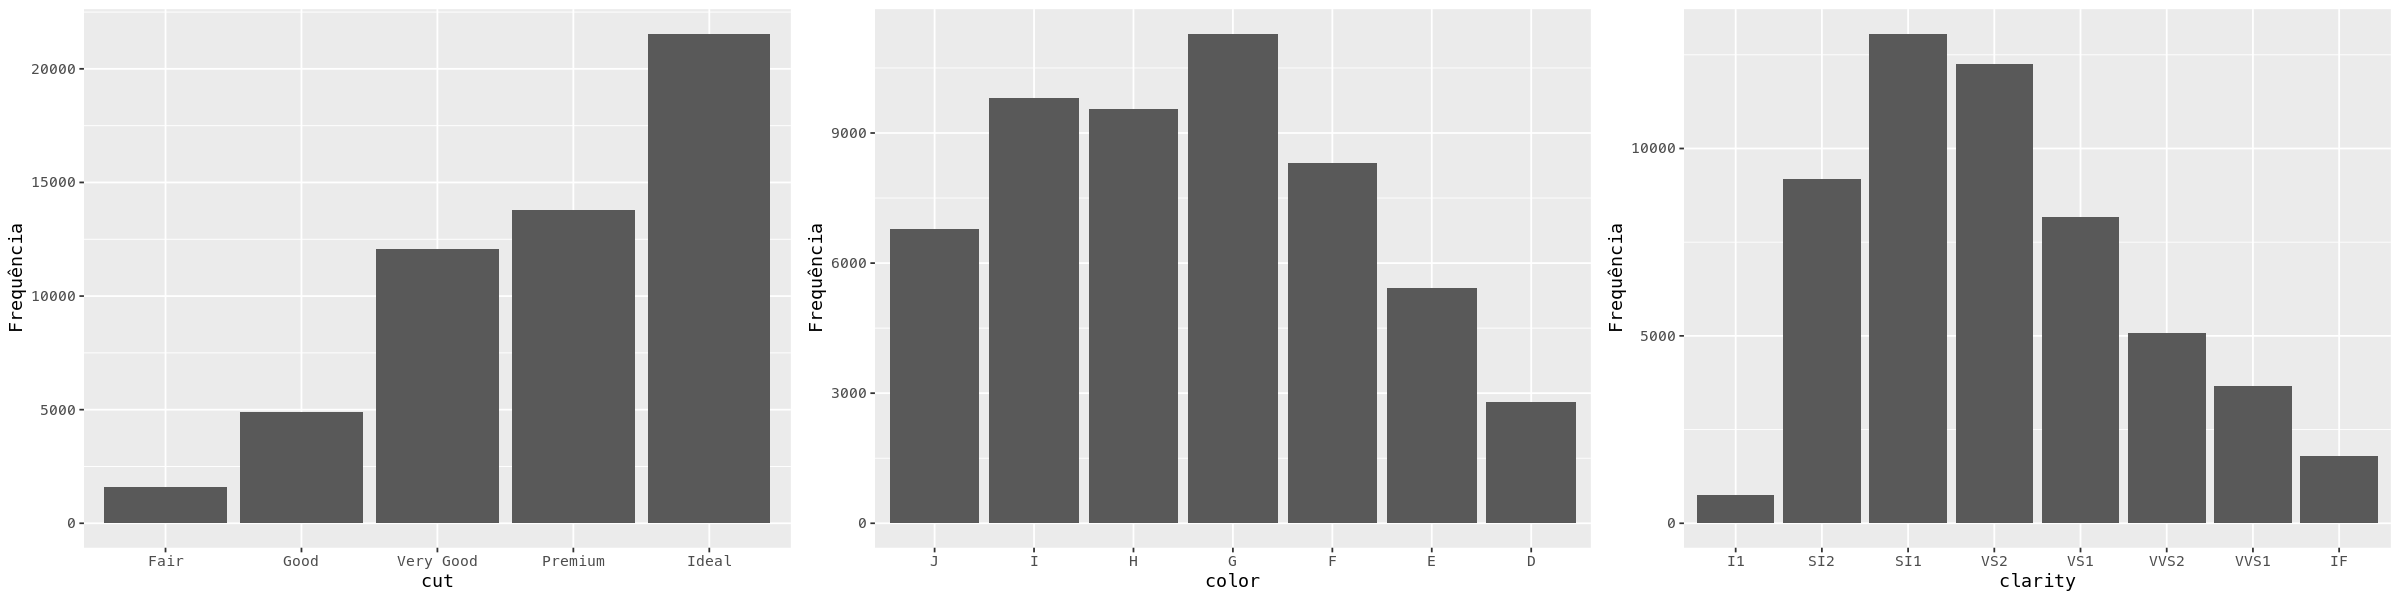

In [52]:
# configurando a área de plotagem dos gráficos
options(repr.plot.width=20, repr.plot.height=5)

# montando os gráficos
Cut     <- ggplot(data=diamantes) + geom_bar(aes(cut))     + ylab('Frequência')
Color   <- ggplot(data=diamantes) + geom_bar(aes(color))   + ylab('Frequência')
Clarity <- ggplot(data=diamantes) + geom_bar(aes(clarity)) + ylab('Frequência')

# exibindo os gráficos
ggarrange(ncol=3, nrow=1, Cut, Color, Clarity)

Agora, exibindo histogramas para as demais variáveis: "carat", "depth", "table", "x", "y" e "z". 

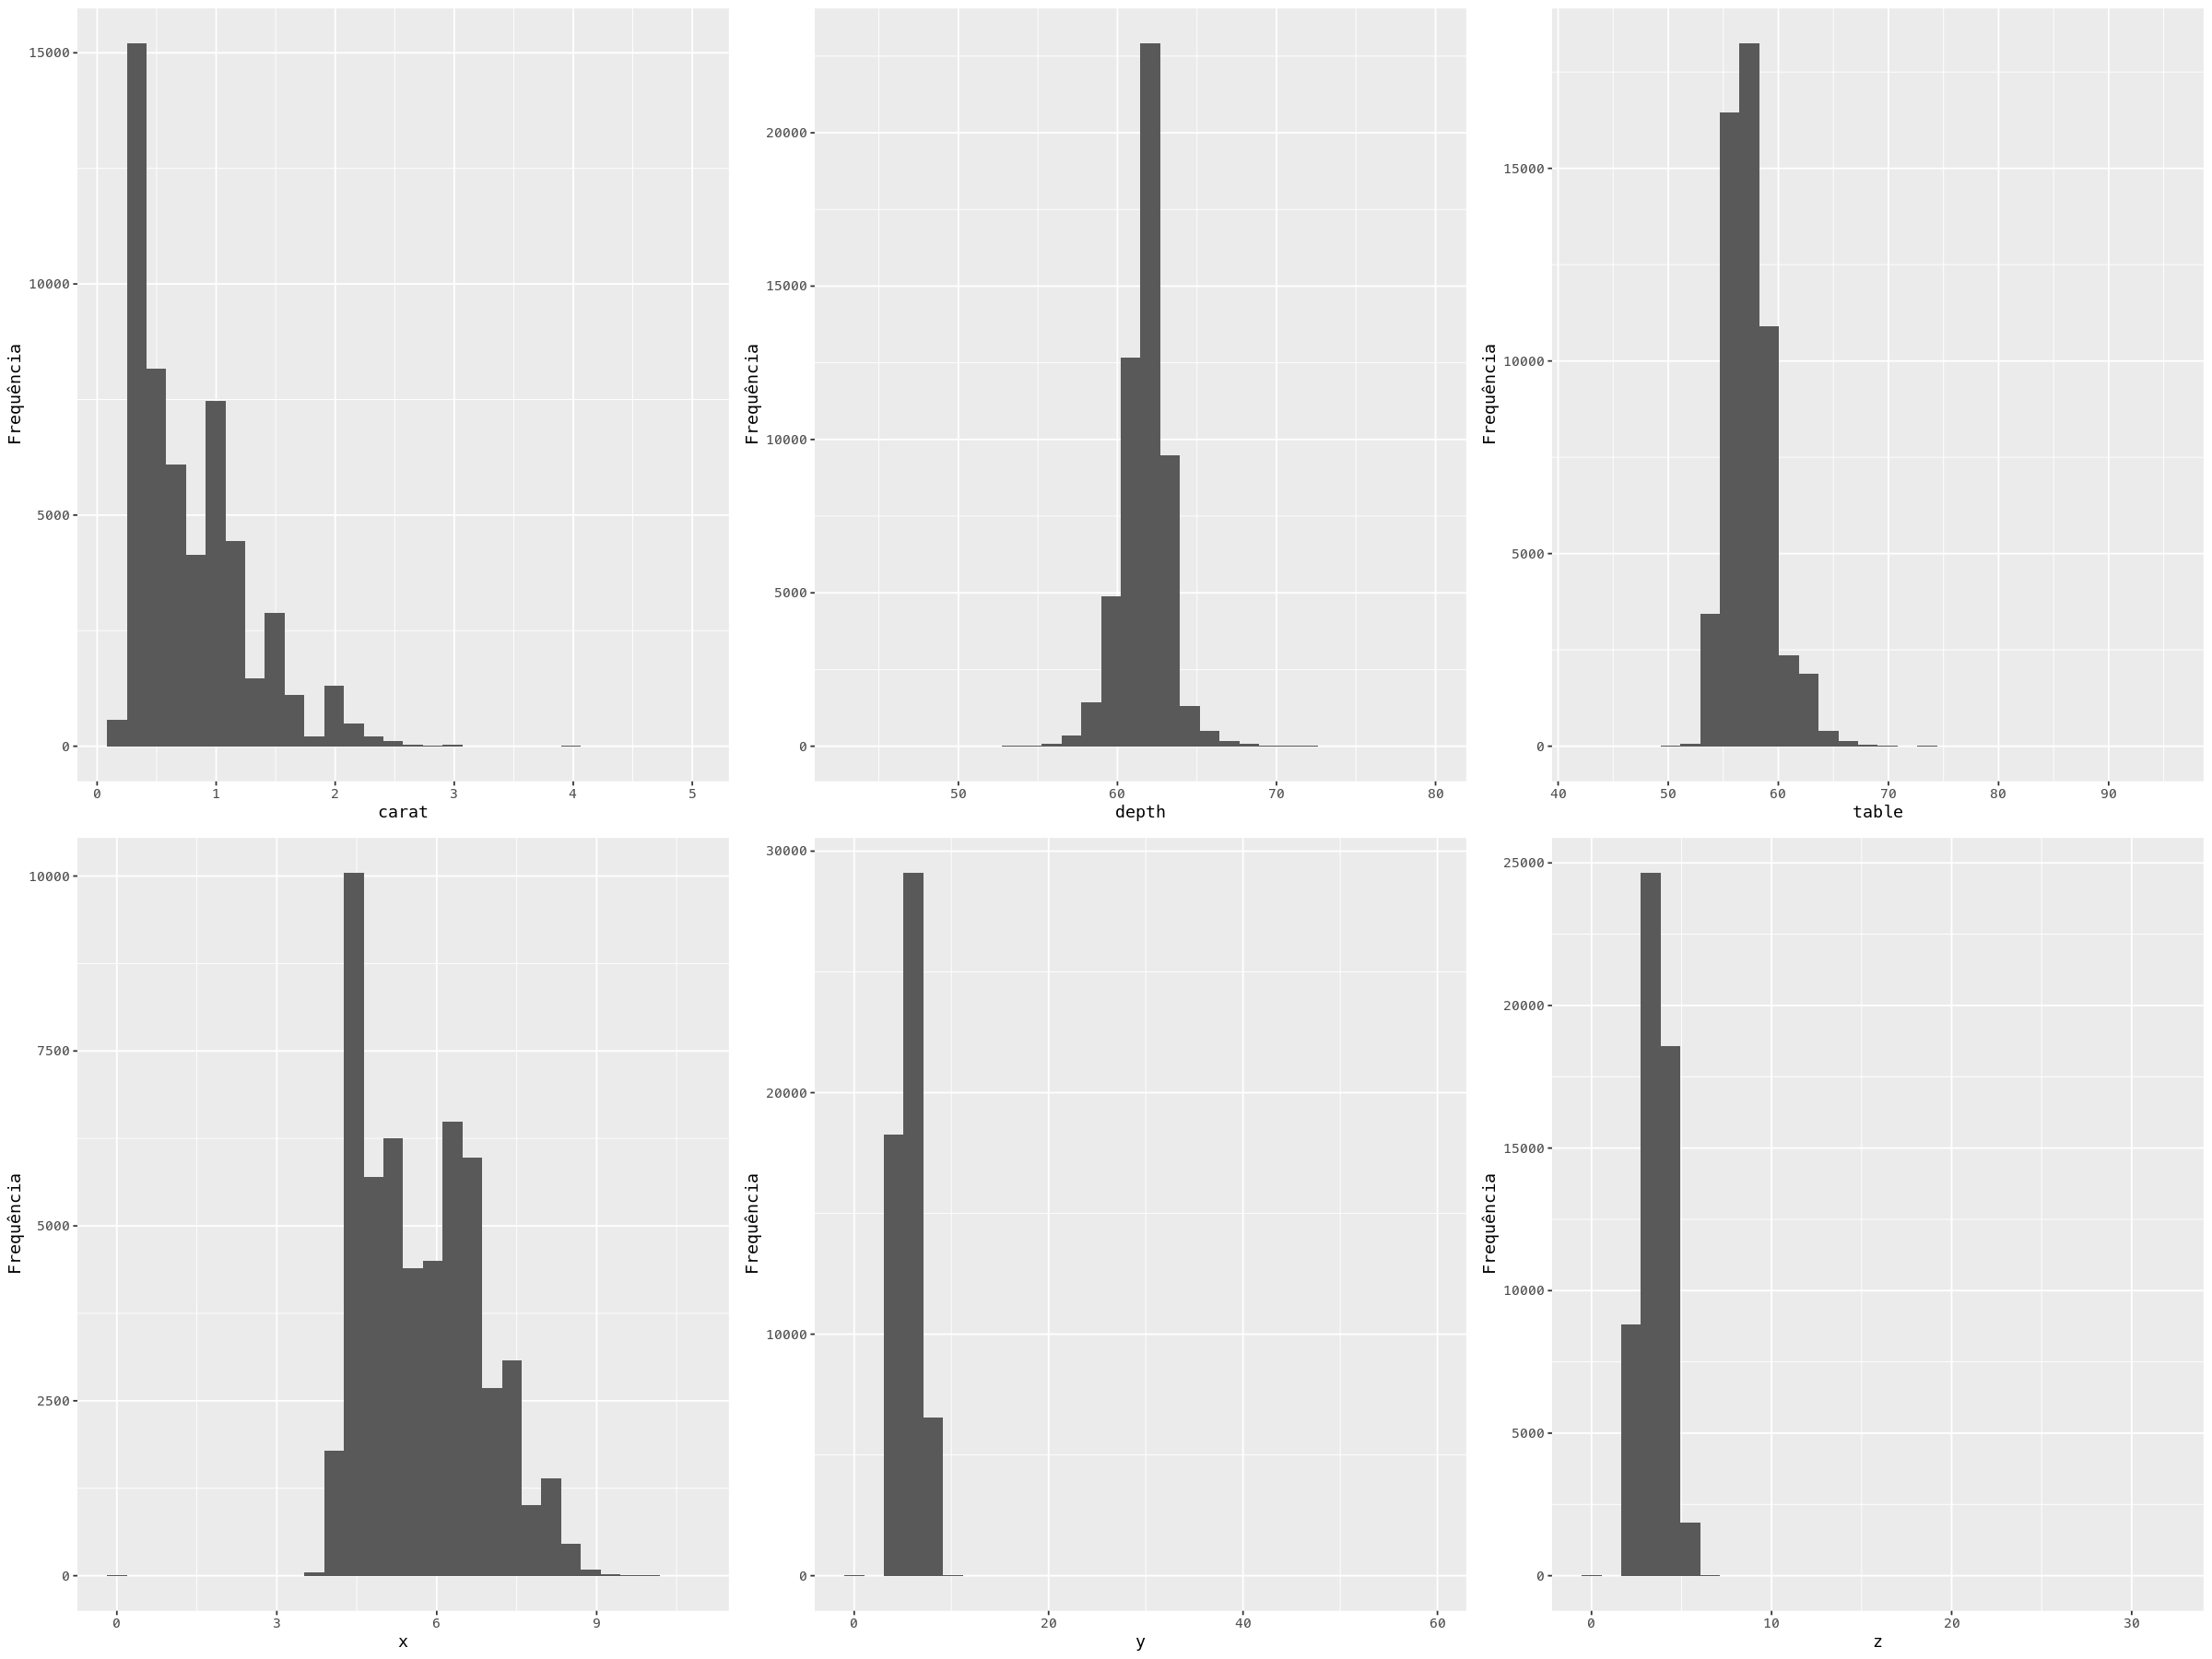

In [53]:
# configurando a área de plotagem dos gráficos
options(repr.plot.width=20, repr.plot.height=15)

# montando os gráficos
Carat   <- ggplot(data=diamantes) + geom_histogram(aes(carat), bins=30) + ylab('Frequência')
Depth   <- ggplot(data=diamantes) + geom_histogram(aes(depth), bins=30) + ylab('Frequência')
Table   <- ggplot(data=diamantes) + geom_histogram(aes(table), bins=30) + ylab('Frequência')
X       <- ggplot(data=diamantes) + geom_histogram(aes(x), bins=30)     + ylab('Frequência')
Y       <- ggplot(data=diamantes) + geom_histogram(aes(y), bins=30)     + ylab('Frequência')
Z       <- ggplot(data=diamantes) + geom_histogram(aes(z), bins=30)     + ylab('Frequência')

# exibindo os gráficos
ggarrange(ncol=3, nrow=2, Carat, Depth, Table, X, Y, Z)

À primeira vista, "carat" e "price", vide histograma do item 6, seguem distribuições muito parecidas, o que pode indicar que eles tem uma correlação, é necessário uma investigação mais detalhada sobre essas variáveis para responder se o peso da pedra tem influência direta sobre seu preço.

Outra coisa que chama atenção são os "outliers" na variável "price", vide boxplot do item 5, seria interessante investigar essas pedras para entender o que elas têm de diferente das demais para serem tão valorizadas. Acredito que isso possa ajudar a responder quais são as variáveis que têm maior influência sobre o preço de um diamante.

**8. Crie "boxplots" para as variáveis numéricas; veja se existem dados anormais (outliers).**

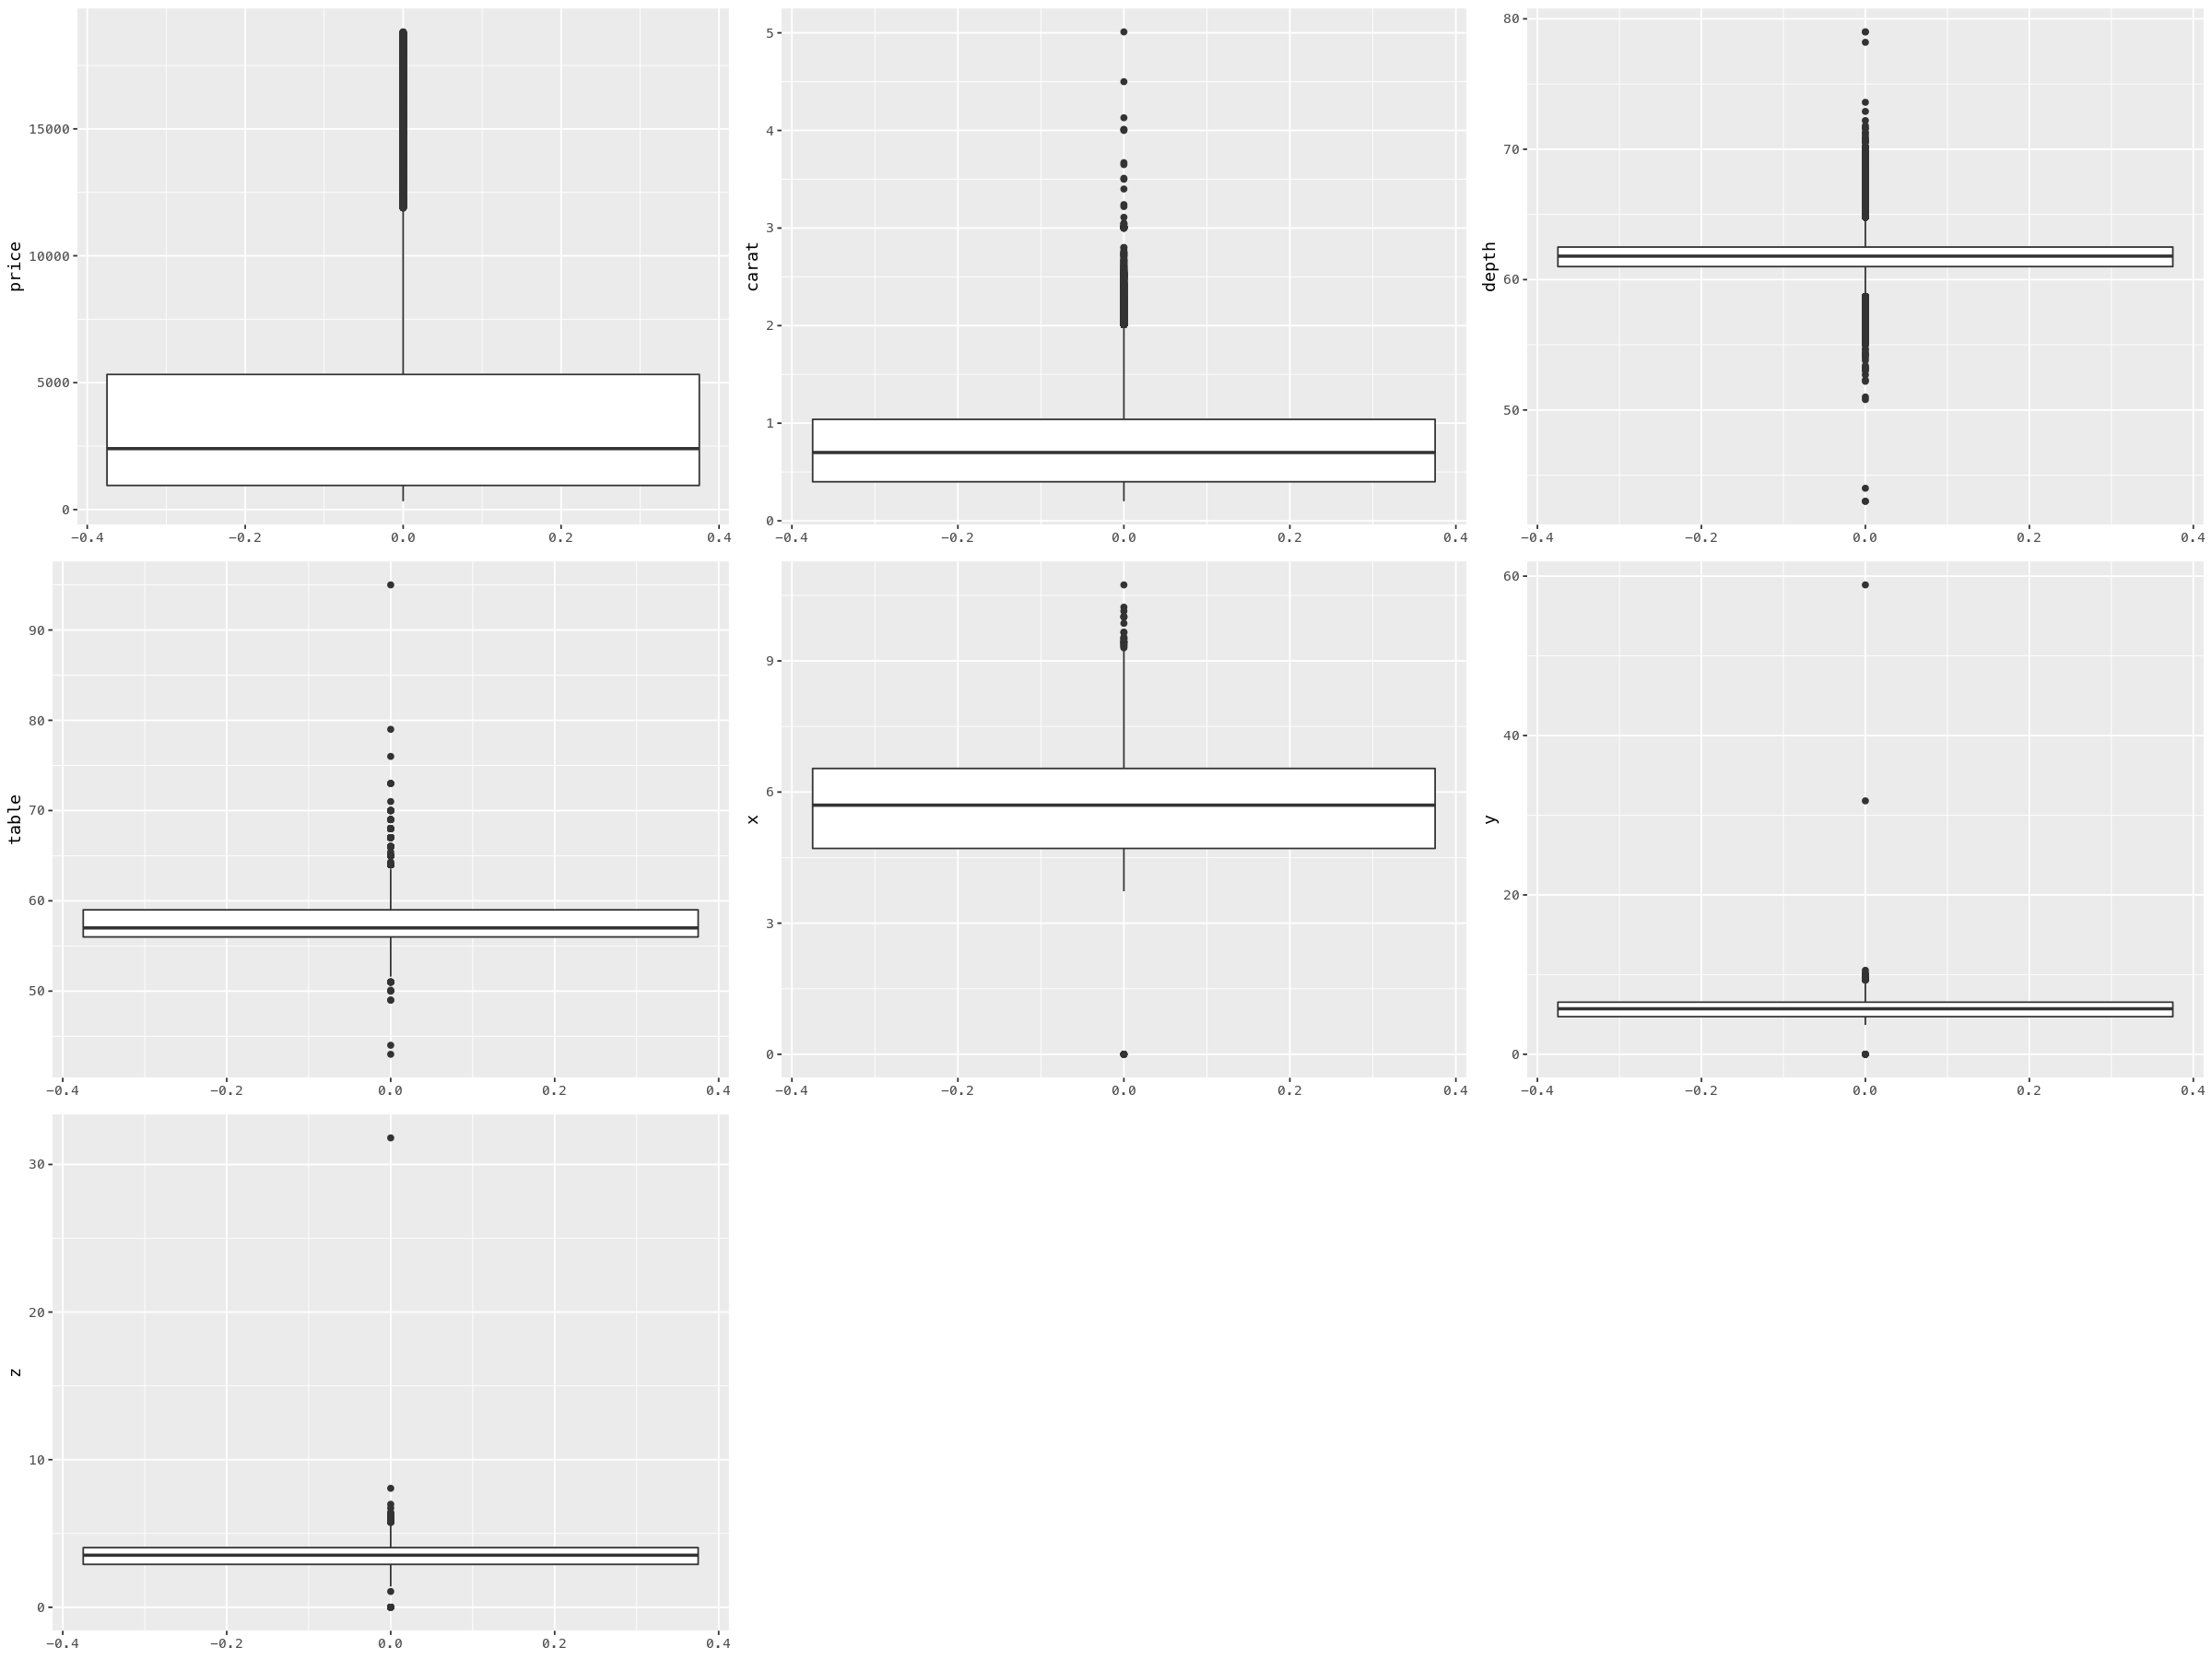

In [46]:
# criando os boxplots para as demais variáveis numéricas: "price", "carat", "depth", "table", "x", "y", "z"
g0_price <- ggplot(data = diamantes) + geom_boxplot(aes(y=price))
g1_carat <- ggplot(data = diamantes) + geom_boxplot(aes(y=carat))
g2_depth <- ggplot(data = diamantes) + geom_boxplot(aes(y=depth))
g3_table <- ggplot(data = diamantes) + geom_boxplot(aes(y=table))
g4_x <- ggplot(data = diamantes) + geom_boxplot(aes(y=x))
g5_y <- ggplot(data = diamantes) + geom_boxplot(aes(y=y))
g6_z <- ggplot(data = diamantes) + geom_boxplot(aes(y=z))

# exibindo todos os boxplots
ggarrange(ncol = 3, nrow = 3, g0_price, g1_carat, g2_depth, g3_table, g4_x, g5_y, g6_z)

**9. Utilize as variáveis categóricas para fazer o facetamento dos dados, mostrando alguns gráficos com 2 ou mais variáveis contínuas lado a lado.**

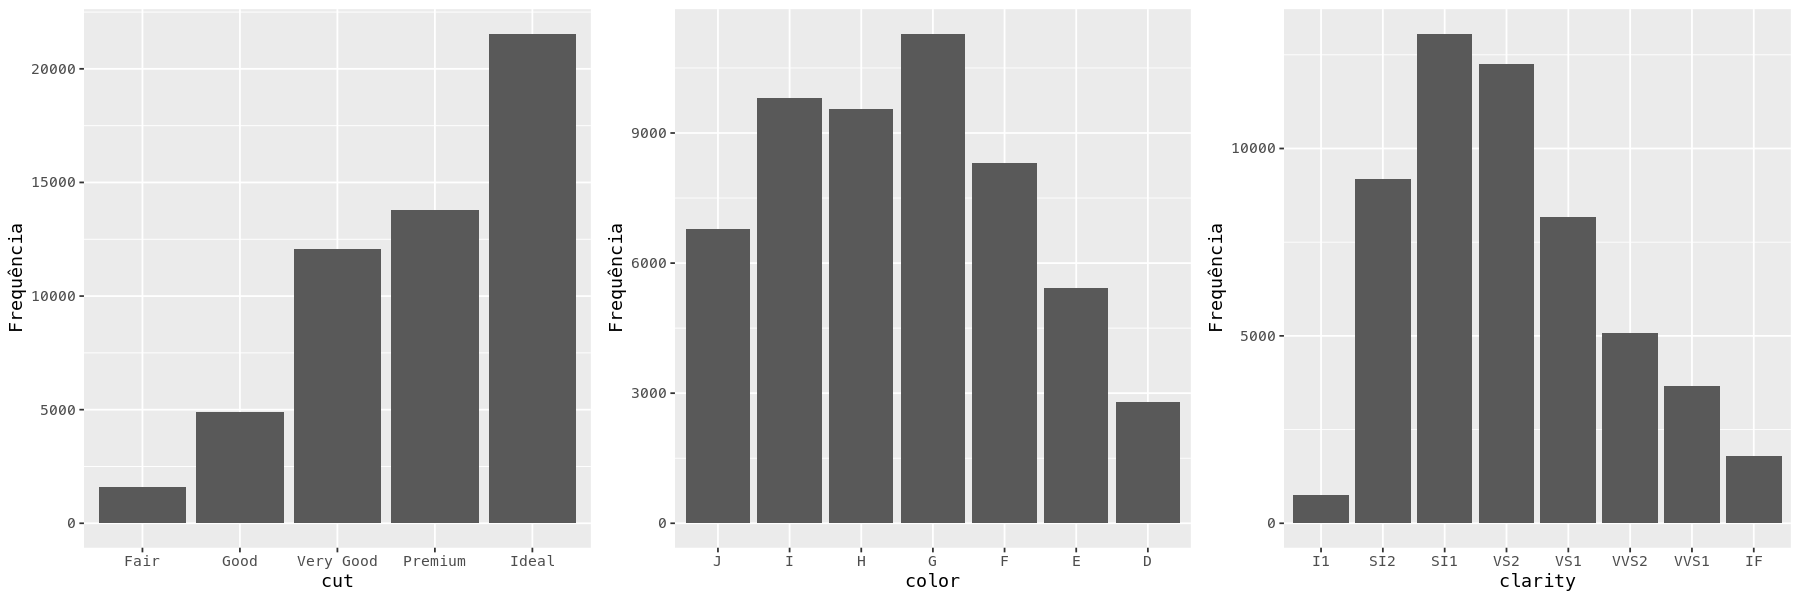

In [104]:
# configurando a área de plotagem dos gráficos
options(repr.plot.width=15, repr.plot.height=5)

# montando os gráficos
Cut     <- ggplot(data=diamantes) + geom_bar(aes(cut))     + ylab('Frequência')
Color   <- ggplot(data=diamantes) + geom_bar(aes(color))   + ylab('Frequência')
Clarity <- ggplot(data=diamantes) + geom_bar(aes(clarity)) + ylab('Frequência')

# exibindo os gráficos
ggarrange(ncol=3, nrow=1, Cut, Color, Clarity)

Vejamos como as variáveis categóricas "cut", "color" e "clarity" se relacionam com a variável "price".

- Variável "cut":

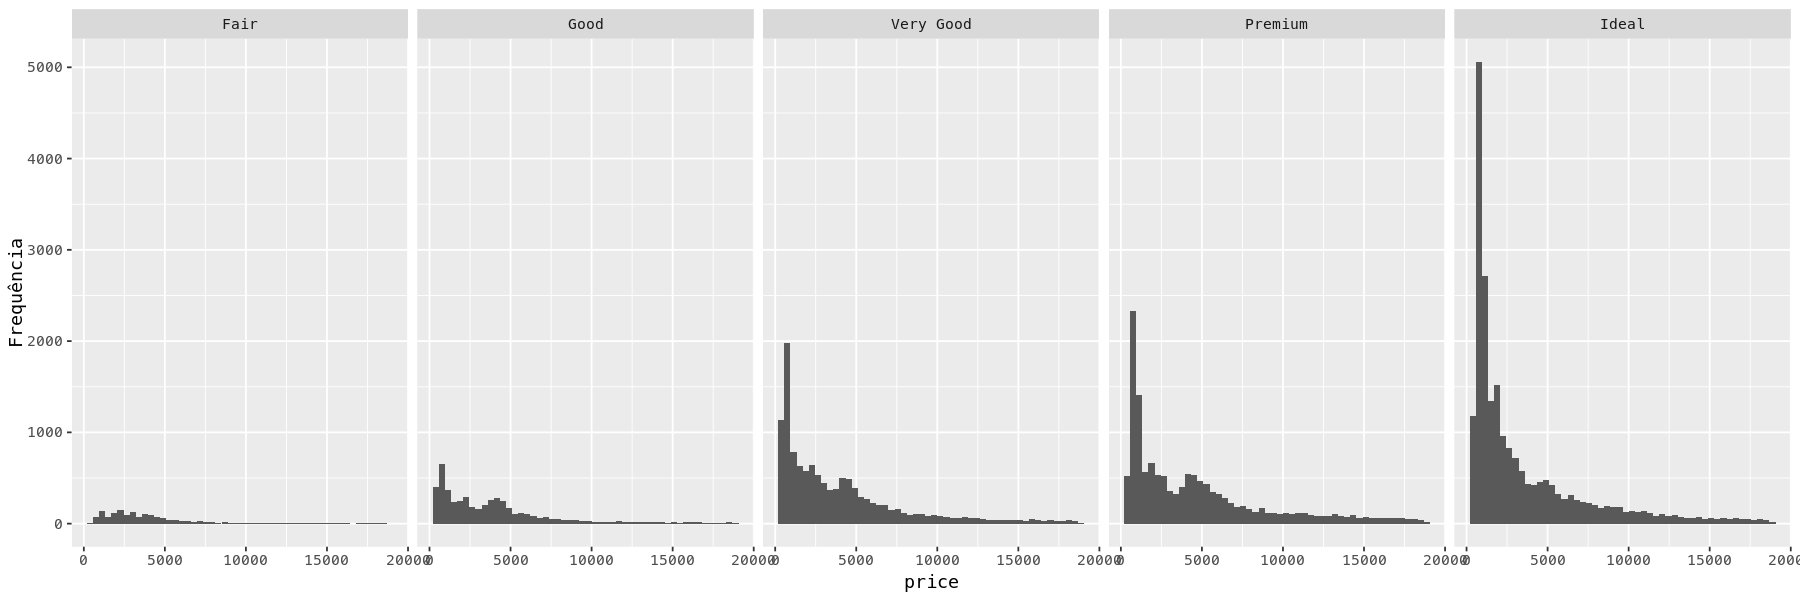

In [95]:
# configurando a área de plotagem dos gráficos
options(repr.plot.width=15, repr.plot.height=5)

# montando e exibindo o gráfico
ggplot(diamantes) +
geom_histogram(aes(price), bins=50) +
labs(y='Frequência') +
# facetando com a variável "color"
facet_grid(. ~ cut)

- Variável "color":

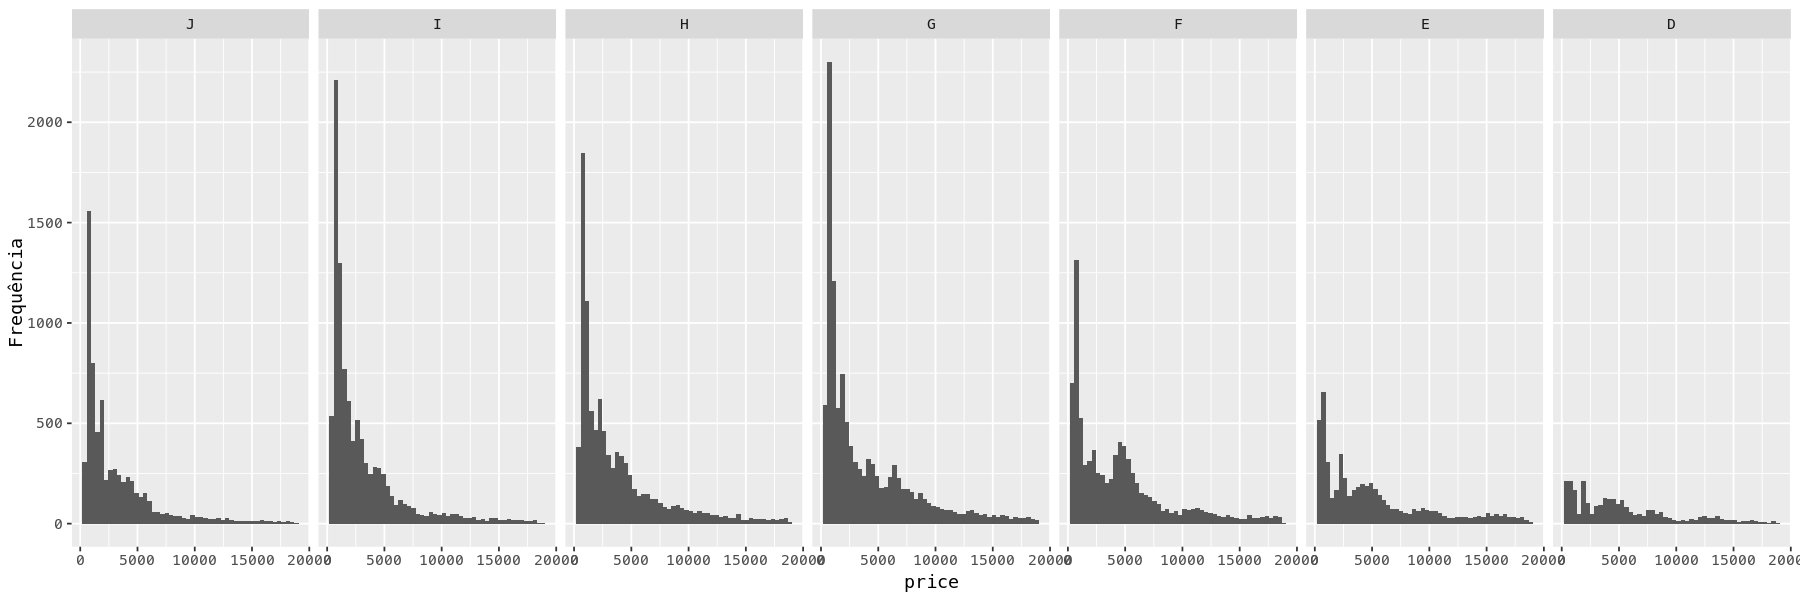

In [96]:
# configurando a área de plotagem dos gráficos
options(repr.plot.width=15, repr.plot.height=5)

# montando e exibindo o gráfico
ggplot(diamantes) +
geom_histogram(aes(price), bins=50) +
labs(y='Frequência') +
# facetando com a variável "color"
facet_grid(. ~ color)

- Variável "clarity":

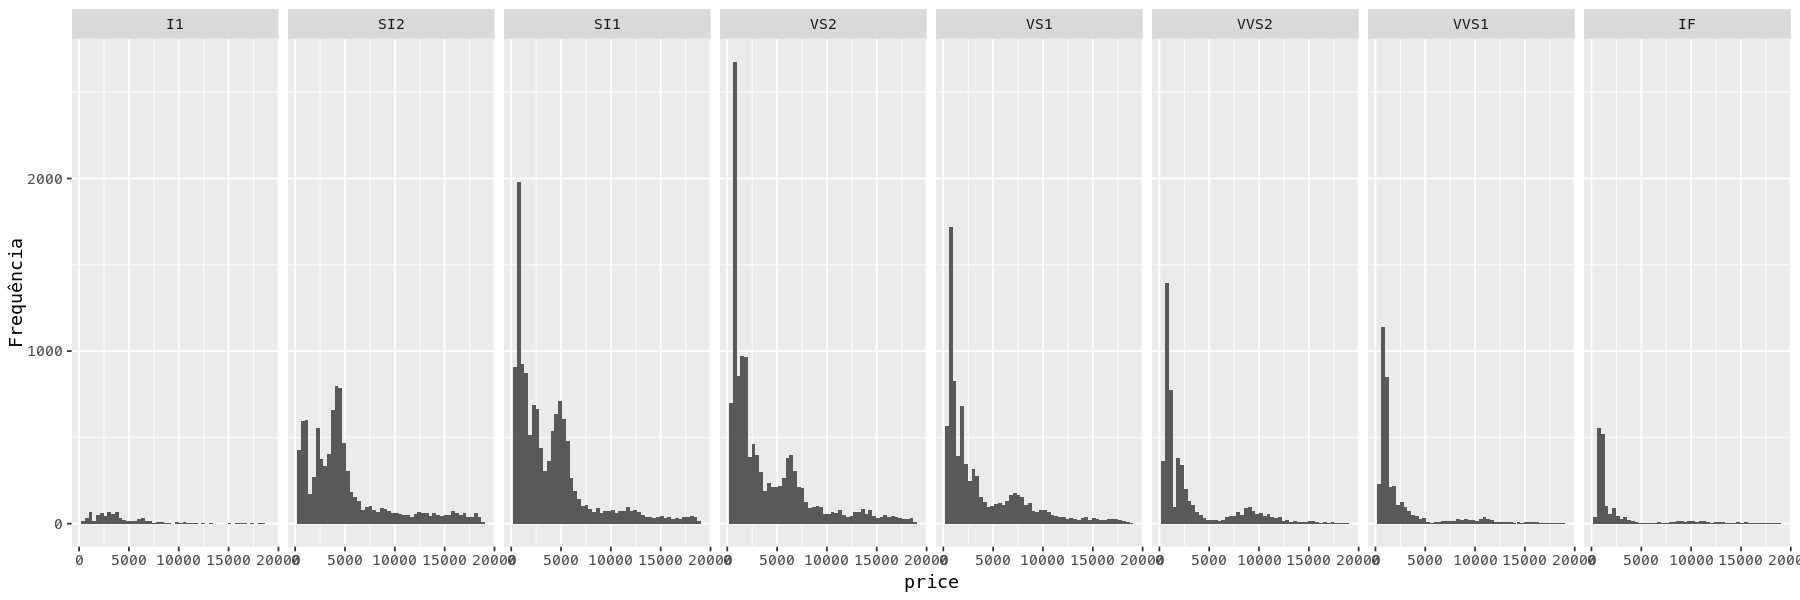

In [97]:
# configurando a área de plotagem dos gráficos
options(repr.plot.width=15, repr.plot.height=5)

# montando e exibindo o gráfico
ggplot(diamantes) +
geom_histogram(aes(price), bins=50) +
labs(y='Frequência') +
# facetando com a variável "clarity"
facet_grid(. ~ clarity)

Correlações entre as variáveis "cut", "color" e "clarity", e a variável "price".

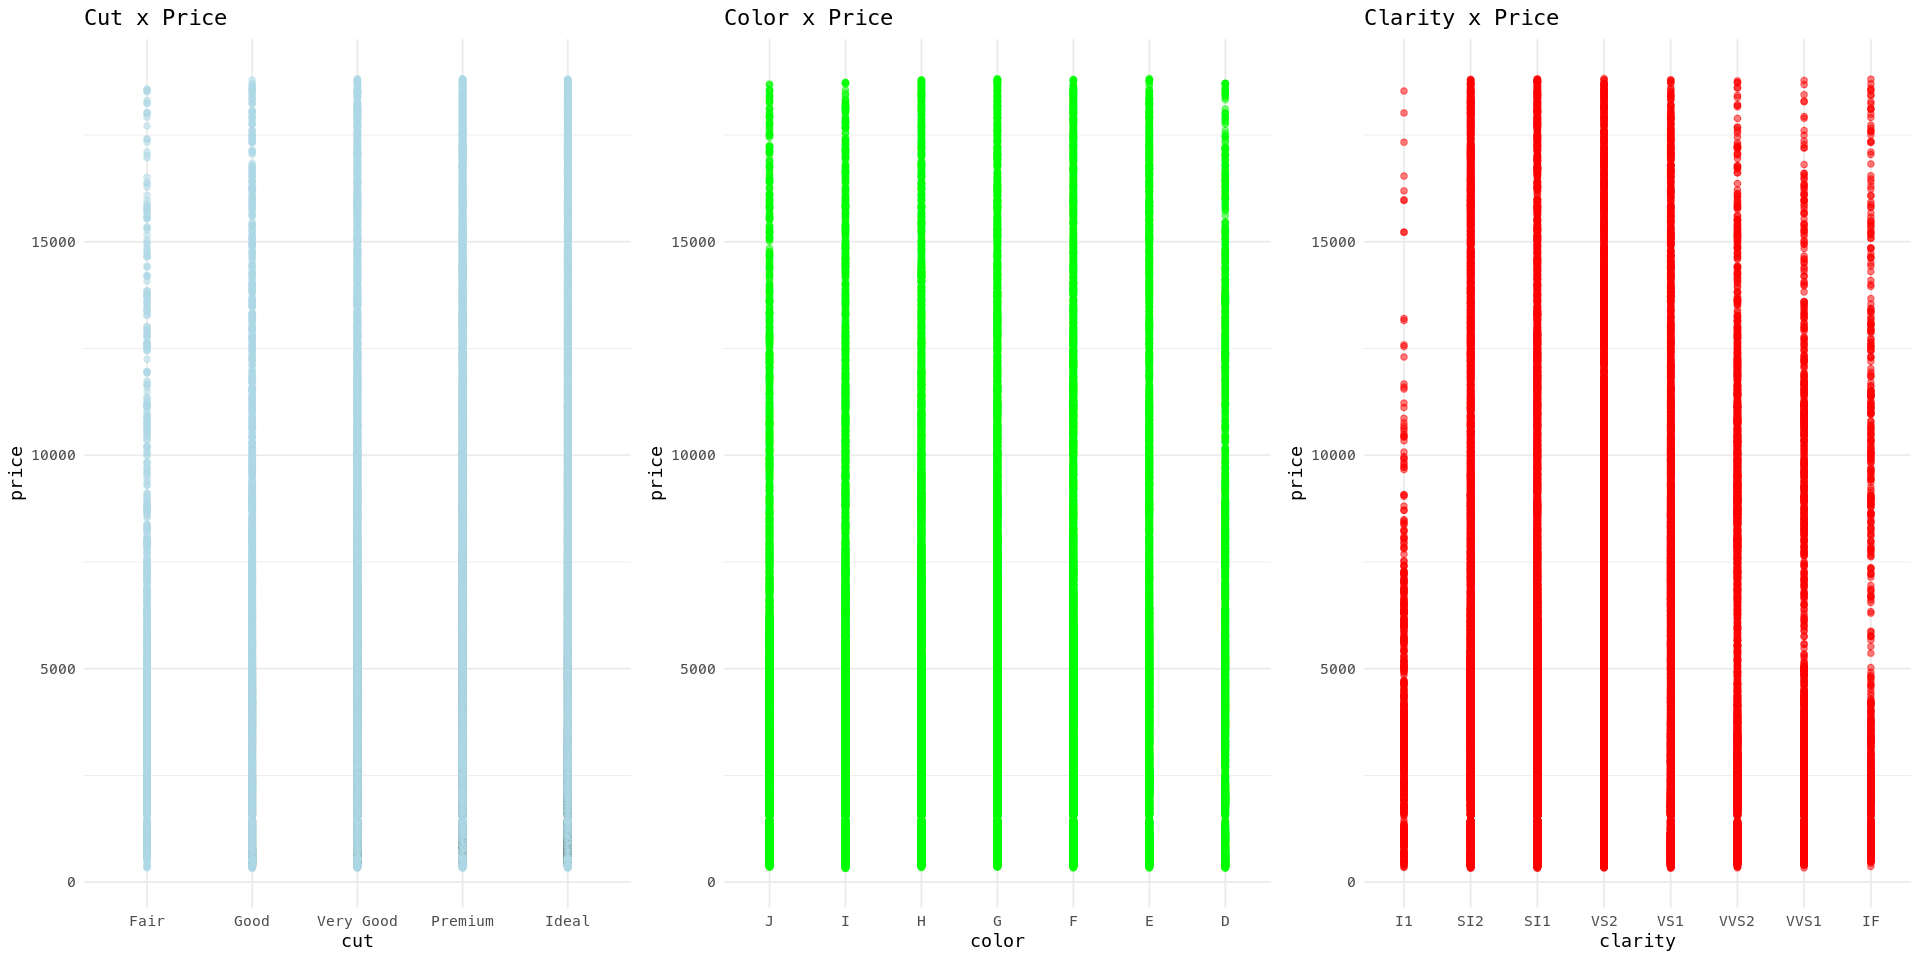

In [103]:
# configurando a área de plotagem dos gráficos
options(repr.plot.width=16, repr.plot.height=8)

# montando os gráficos
Cut       <- ggplot(diamantes, aes(x=cut, y=price)) + geom_point(color='lightblue', alpha=0.5) +
                theme_minimal() + ggtitle("Cut x Price")
Color     <- ggplot(diamantes, aes(x=color, y=price)) + geom_point(color='green', alpha=0.5) +
                theme_minimal() + ggtitle("Color x Price")
Clarity   <- ggplot(diamantes, aes(x=clarity, y=price)) + geom_point(color='red', alpha=0.5) +
                theme_minimal() + ggtitle("Clarity x Price")

# exibindo os gráficos
ggarrange(ncol=3, nrow=1, Cut, Color, Clarity)

O facetamento entre as variáveis "price" e "cut" não deixa muito claro como elas interagem, percebe-se que quanto melhor o corte das pedras mais caras elas são, mas mesmo assim encontramos pedras com cortes inferiores com o mesmo valor de pedras com corte superior. O mesmo comportamento é visto no facetamento de "price" com as variáveis "color" e "clarity".

Esse comportamento demonstra que para as pedras mais valiosas do dataset o preço é composto pela combinação dessas variáveis, sem uma predominância de uma variável específica.